<a href="https://colab.research.google.com/github/Hertie-School-Machine-Learning-F2022/Class_Lab_07/blob/main/Class_Lab_07_GRAD_C24_fall_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resampling and regularisation

GRAD-C24, Lab 07

Date: 04.11.2022



## Overfitting and Underfitting

Machine learning models can never make perfect predictions. This failure comes from a fundamental trade-off between how flexible a model can become and how much data it can see when training.

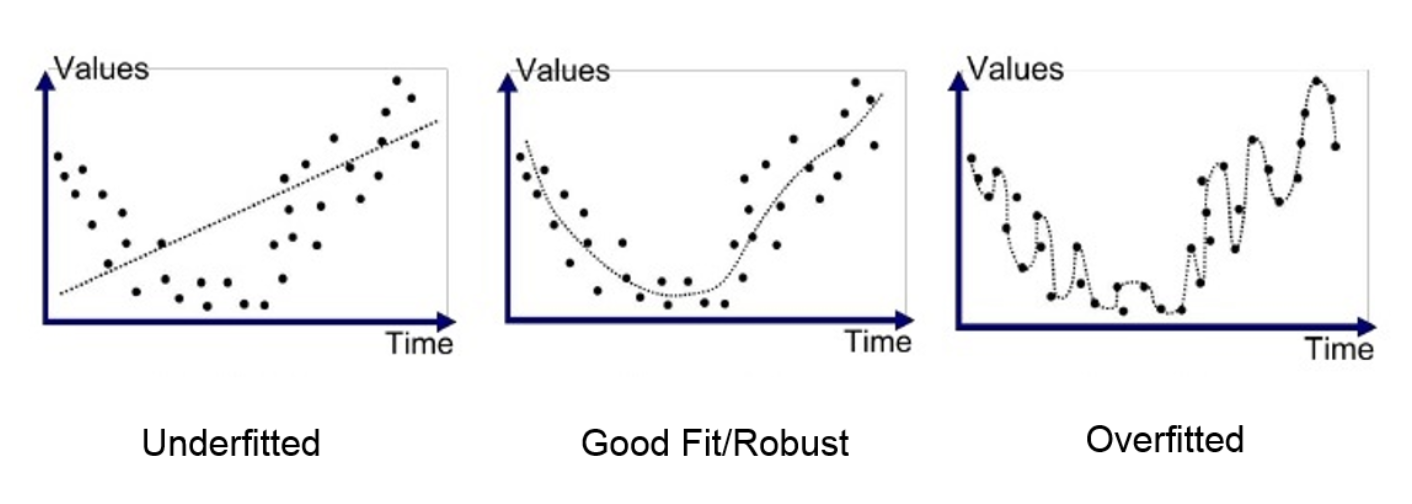

**Overfitting**

Models too complex for the data overfit:
They explain too well the data that they have seen and do not generalize.

**Underfitting**

Models too simple for the data underfit:
They capture no noise, and are limited by their expressivity.

In [ ]:
# We will use this data to explain with more detail.
# In this dataset, we want to predict the median value of houses in California.



#Set data and target 


In [ ]:
# Transform the target prices from 100 to thousands


In [ ]:
# See data


In [ ]:
# To solve this regression task, we will use a Decision Tree Regressor 

In [ ]:
# After training the regressor, we would like to know its potential generalization 
# performance once deployed in production.

# For this purpose, we use the mean absolute error, which gives us an error in the target's unit


In [ ]:
#Let's plot it
how()

### What do we see? 

We get perfect prediction with no error. 

### Why?

When models are too optimistic, they are usually pointing towards a methodological problem in our pipeline.



In this case, the mistake lies on the fact that we trained and predicted on the same dataset. 

What all that our decision tree model did was to memorize the dataset when fitted, it will lead to an error of 0.

**This error computed above is called the *empirical error* or *training error*.**

In Machine Learning, the aim is to minimize the error on data that has not been seen, which is called the ***generalization error*** or the ***“true” testing error***.

# Resampling 

Resampling methods allow us to draw samples from a trainng set and refit a model of intrest on each sample to obtain additional information about the fitted model. 

It allows us to see how a model would perform on data it has not been trained on, without collecting new data (i.e., gives us information about the true testing error) 

## 1. Validation Set approach

Randomly divide the dataset into training and testing set (other names: validation set, hold out set).

In [ ]:
# Simple Train and Testing split 


# Train


In [ ]:
# First let's see the trianing error.



In [ ]:
# Plot


In [ ]:
# However, if we now compute the testing error using
# unseen data, we no longer have the same results.


In [ ]:
# Plot



However, test error rate is highly variable depending on which observations are in the each set. 

When a small number of observations are used to fit the model, usually modeles perform worse. 

When we separete the data, we can never be sure of how biased the sample turned out. 


## 3. K-fold cross-validation

The most common approach involves randomly dividing the set of observations into k groups of the same size.

The first fold is treated as a validation set and the model is fit on the remaining folds.

The procedure is then repeated k times, where a different group is treated as the validation set.

In [ ]:
# K-fold



In [ ]:
# scikit-learn provide a cross_val_score function which makes evaluation faster.



### How can we use training and testing error to know if our model is generalizing, overfitting or underfitting?

In [ ]:
# Using cross validate we can access the training and the testing errors.



In [ ]:
# The cross-validation used the negative mean absolute error.
# We transform the negative mean absolute error into a positive 
# mean absolute error for plotting.


Here, we observe a training error of zero, meaning that the model is not under-fitting: it is flexible enough to capture any variations present in the training set.

However, the testing error is bigger. This tells us that the model is over-fitting: the model has memorized many variations of the training set that could be considered “noisy” because they do not generalize to help us make good prediction on the test set.


How can we find a good point between overfitting and underfitting? 


# Regularization

Regularization is a method to prevent overfitting. 

Regularization refers to techniques that are used to calibrate machine learning models to minimize the adjusted loss function and prevent overfitting or underfitting.

In Decision Trees, for example, one can control how much a tree can "grow" by adjusting the "max_depth" parameter.

In [ ]:
# We will use a validation curve function to visualize how adjusting a paramter
# can give us less or more testing error and training error.


In [ ]:
# Plot



In [ ]:
# GridSearchCV


## More regularization!

Linear Regression and Logistic Regression use the LSM to estimate their parameters (linear models). 

We can replace least squares with other fitting procedures, given that there are situations when LS fails. 

Regularization methods such as lasso or ridge make the predictions less sensitive to small training sets by adding bias to the model.


## Lasso 

Lasso uses the absolut value of the parameter beta instead of its squared value. 
However, if lambda is large enough, some coefficients will effectively be 0! Therefore, lasso can also perform variable selection, making the model much easier to interpret.

In [ ]:
# We will use a new data set "advertising"



# load the data


# look at the first two rows


In [ ]:
# drop Unnamed: 0 column 


This is a media studies research project: 

We want to analyze how propaganda and product placement work in right wing media, by predicting sales on three different mediums (TV, radio, newspaper).

In [ ]:
# Create function to plot features



In [ ]:
# Plot 


TV and radio ads seem to be good predictors for sales, while there seems to be no correlations between sales and newspaper ads. 

In [ ]:
# For this example, we will use Multiple Linear Regression



In [ ]:
# Let's do a lasso



In [ ]:
# Let's take a look at the curves

